# Computer Vision SS 2021
## Exercise Sheet 2: Image Acquisition, Optics
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Onurcan Köken
2. Sazid Rahman Simanto
3. Mokrane Ouarezki
4. Muhammad Junaid 


## Exercise 2.1 
### Thin Lenses
Consider a thin lens with a fixed focal length $f$. The light rays coming from an object are focussed by the lens so that the depicted object is in focus at a distance $f_c$ behind the lens. This setting is visualized in the following figure:

<img src="https://drive.google.com/uc?id=1-Wu6CkCwgJkMWUdb20UkFsBjXBvLCJ3V" alt="drawing" width="400"/>

Draw a sketch of how $f_c$ would change for an object, which is placed closer to the lens and one placed further away.

1. When the object is placed further away from the lens, $f_c$ would be smaller.
2. When the object is placed closer to the lens, $f_c$ would be bigger.

Here is the drawing:

![](https://drive.google.com/uc?export=view&id=1EtLTWXoUm3l-dEx4f4_zn7ZquyoFRIAA)

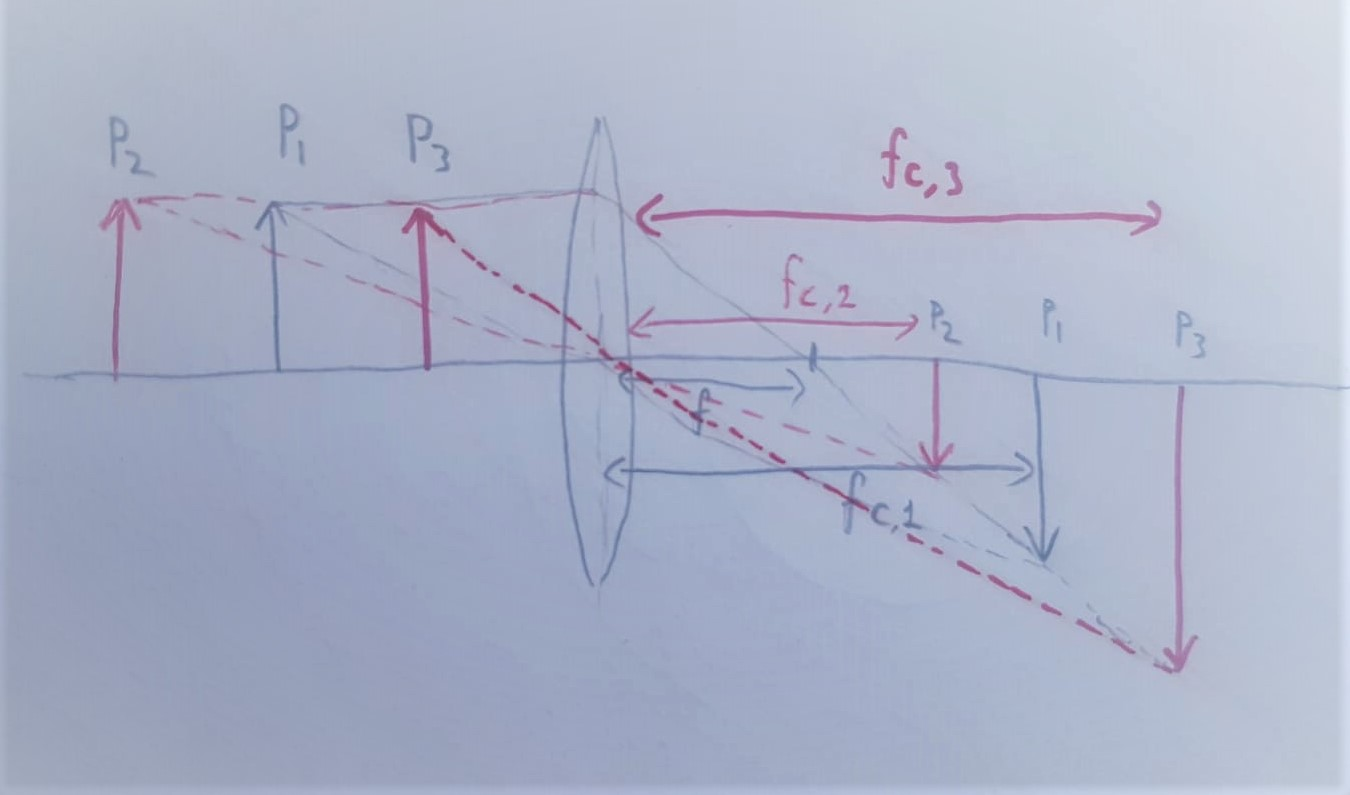

In [1]:
from IPython import display
display.Image("figures/ex2_1.jpeg")

## Exercise 2.2
### The influence of the focal length
For a given object we place the image plane at the distance $f_c$ behind the lens, so that the object representation is in focus. How would the image change if the focal length of the lens would increase or decrease?

1. If the focal length of the lens increase, the distance of image plane $f_c$ behind the lens would increase.
2. If the focal length of the lens decrease, the distance of image plane $f_c$ behind the lens would decrease.

Here is the drawing:

![](https://drive.google.com/uc?export=view&id=1WlyhYenkdTJ9y1Nfcyrz0LTPQt1qubgD)

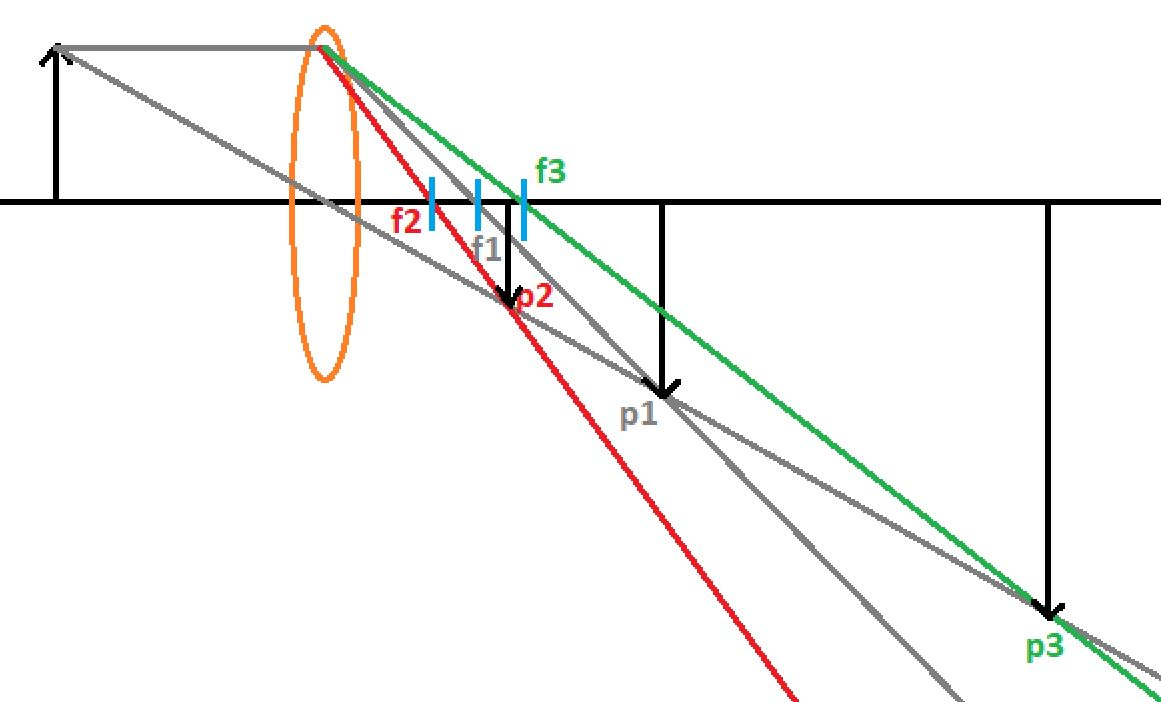

In [2]:
display.Image("figures/ex2_2.JPG")

If we have the screen at P1, but our f is f3, in this case what will happen?
Same for f2?

It will be blurred in both cases.

## Exercise 2.3
### The influence of the aperture
We now add an aperture to the previous model. For simplicity it is placed exactly at the position of the lens. This means that the aperture can be used to decrease the effective diameter of the lens without an influence on the focal length.
In the previous exercise the image plane was placed at the distance $f_c$ corresponding to a focal length $f$ of the lens. Then, the focal length is slightly reduced.
What influence does the reduction of the aperture have on the image? **Draw a sketch!** Which effect can one observe when the diameter of the aperture is very small?

Aperture is the effective lens diameter that can be used to change the focus. When diameter of the aperture is very small, pinhole camera effect will be observed.
Which means, the image will be darker, everything is equally blurred (blue is constant, does not depend on distance) and it requires longer light exposure.

As aperture decreases (shrinks), for example F32
* Image will become darker
* DoF is deeper, larger
* Wider focus range 



As aperture increases (larger), for examle F1,4
* Image will become brighter
* DoF is more shallow, small
* More focused on the object and background is blurred

In the drawing below, it is focused perfect for the 2nd case.

Here is the drawing:

![](https://drive.google.com/uc?export=view&id=1UXvduUfsK28omw7tthNsoXfE5RFrf4ap)

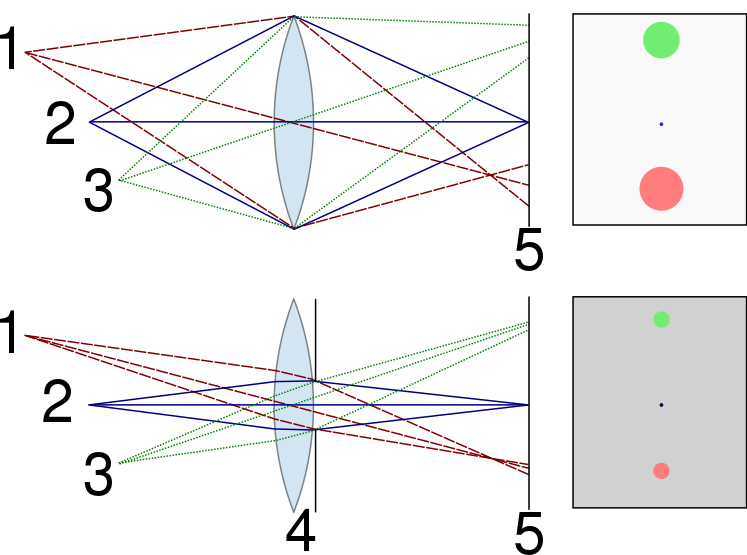

In [3]:
display.Image("figures/ex2_3.png")

The point in the image plane should be smaller than the pixel to have it clear. When we are mapping the image points into image plane, it should be smaller than the pixel image, if it is larger then it will be blurred.

Reference of the image above: https://en.wikipedia.org/wiki/File:Depth_of_field_illustration.svg

## Exercise 2.4
### Conversion between pixel and camera coordinates
Load data set `ueb24.npy` `(np.load)`.
The image $B(i,j)$ is not a conventional intensity image. Each pixel $p = (x,y,f)^T$ encodes the distance from the focal point of the camera $(0, 0, 0)^T$ to a point in the 3D scene $P = (X, Y, Z)$. $p$ is the projection of $P$ on the image plane. So, the location corresponding to the pixel $p$ from the image matrix $B(i,j)$ will hold the distance $r$ between the point $P$ and the focal point. The image plane containing the pixel $p$, is placed at the distance $f$ from the focal point, parallel to the $XY$ plane.

<img src="https://drive.google.com/uc?id=1TZT2lNjms_CrNBQGC3G3pI3XPZ3iMR3j" alt="drawing" width="400"/>


Write a Python routine that maps each pixel $p$ in $B(i,j)$ to the corresponding point $P = (X,Y,Z)$. Visualize the result in a 3D surface plot `(plt.plot_surface)`. Consider that you are using a camera with focal length $f = 0.008$ meters and a CCD-chip, in which the size of a pixel is $0.00004$ meters. The optical axis intersects the centre of the image matrix, which corresponds to the frame coordinates $(71.5, 87.5)$ on the CCD-chip.

Some helpful commands: `np.arange, np.ones, np.meshgrid`.

p(x, y, f) is in 2D, P(X, Y, Z) is in 3D

In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

fatal: destination path 'cs4250' already exists and is not an empty directory.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# load matrix
img = np.load("/content/cs4250/data/exercise_2/ueb24.npy")
print("img: ", img)
print("img shape:", img.shape)
# define constants
f = 0.008 # focal length in meters
pixel_size = 0.00004 # pixel size in meters
center = [71.5, 87.5] # optical axis interects the center of the image matrix, frame coordinates on the CCD-chip

img:  [[0.115 0.115 0.115 ... 0.115 0.115 0.115]
 [0.115 0.115 0.115 ... 0.115 0.115 0.115]
 [0.115 0.115 0.115 ... 0.115 0.115 0.115]
 ...
 [0.115 0.115 0.115 ... 0.115 0.115 0.115]
 [0.115 0.115 0.115 ... 0.115 0.115 0.115]
 [0.115 0.115 0.115 ... 0.115 0.115 0.115]]
img shape: (144, 176)


In [ ]:
# Create 3 2d-Matrices, each containing the x,y and z value of a vector respecitively. 
# Those vectors are supposed to "point at" the image pixels from the centre of focus.

# to keep dimensions the same, we have used center + 1
x = ((center[0]+1)-np.arange(1,2*center[0]+2))*pixel_size
y = ((center[1]+1)-np.arange(1,2*center[1]+2))*pixel_size
print(x)

[ 2.86e-03  2.82e-03  2.78e-03  2.74e-03  2.70e-03  2.66e-03  2.62e-03
  2.58e-03  2.54e-03  2.50e-03  2.46e-03  2.42e-03  2.38e-03  2.34e-03
  2.30e-03  2.26e-03  2.22e-03  2.18e-03  2.14e-03  2.10e-03  2.06e-03
  2.02e-03  1.98e-03  1.94e-03  1.90e-03  1.86e-03  1.82e-03  1.78e-03
  1.74e-03  1.70e-03  1.66e-03  1.62e-03  1.58e-03  1.54e-03  1.50e-03
  1.46e-03  1.42e-03  1.38e-03  1.34e-03  1.30e-03  1.26e-03  1.22e-03
  1.18e-03  1.14e-03  1.10e-03  1.06e-03  1.02e-03  9.80e-04  9.40e-04
  9.00e-04  8.60e-04  8.20e-04  7.80e-04  7.40e-04  7.00e-04  6.60e-04
  6.20e-04  5.80e-04  5.40e-04  5.00e-04  4.60e-04  4.20e-04  3.80e-04
  3.40e-04  3.00e-04  2.60e-04  2.20e-04  1.80e-04  1.40e-04  1.00e-04
  6.00e-05  2.00e-05 -2.00e-05 -6.00e-05 -1.00e-04 -1.40e-04 -1.80e-04
 -2.20e-04 -2.60e-04 -3.00e-04 -3.40e-04 -3.80e-04 -4.20e-04 -4.60e-04
 -5.00e-04 -5.40e-04 -5.80e-04 -6.20e-04 -6.60e-04 -7.00e-04 -7.40e-04
 -7.80e-04 -8.20e-04 -8.60e-04 -9.00e-04 -9.40e-04 -9.80e-04 -1.02e-03
 -1.06

In [ ]:
x, y = np.meshgrid(y, x)
z = np.ones(x.shape)*f
print(x)
print(x.shape)
print(y)
print(y.shape)
print(z)
print(z.shape)

[[ 0.0035   0.00346  0.00342 ... -0.00342 -0.00346 -0.0035 ]
 [ 0.0035   0.00346  0.00342 ... -0.00342 -0.00346 -0.0035 ]
 [ 0.0035   0.00346  0.00342 ... -0.00342 -0.00346 -0.0035 ]
 ...
 [ 0.0035   0.00346  0.00342 ... -0.00342 -0.00346 -0.0035 ]
 [ 0.0035   0.00346  0.00342 ... -0.00342 -0.00346 -0.0035 ]
 [ 0.0035   0.00346  0.00342 ... -0.00342 -0.00346 -0.0035 ]]
(144, 176)
[[ 0.00286  0.00286  0.00286 ...  0.00286  0.00286  0.00286]
 [ 0.00282  0.00282  0.00282 ...  0.00282  0.00282  0.00282]
 [ 0.00278  0.00278  0.00278 ...  0.00278  0.00278  0.00278]
 ...
 [-0.00278 -0.00278 -0.00278 ... -0.00278 -0.00278 -0.00278]
 [-0.00282 -0.00282 -0.00282 ... -0.00282 -0.00282 -0.00282]
 [-0.00286 -0.00286 -0.00286 ... -0.00286 -0.00286 -0.00286]]
(144, 176)
[[0.008 0.008 0.008 ... 0.008 0.008 0.008]
 [0.008 0.008 0.008 ... 0.008 0.008 0.008]
 [0.008 0.008 0.008 ... 0.008 0.008 0.008]
 ...
 [0.008 0.008 0.008 ... 0.008 0.008 0.008]
 [0.008 0.008 0.008 ... 0.008 0.008 0.008]
 [0.008 0.008 

In [ ]:
norm = np.sqrt(x*x+y*y+z*z)
print(norm)

[[0.00918856 0.0091734  0.00915838 ... 0.00915838 0.0091734  0.00918856]
 [0.00917619 0.009161   0.00914597 ... 0.00914597 0.009161   0.00917619]
 [0.00916397 0.00914877 0.00913372 ... 0.00913372 0.00914877 0.00916397]
 ...
 [0.00916397 0.00914877 0.00913372 ... 0.00913372 0.00914877 0.00916397]
 [0.00917619 0.009161   0.00914597 ... 0.00914597 0.009161   0.00917619]
 [0.00918856 0.0091734  0.00915838 ... 0.00915838 0.0091734  0.00918856]]


In [ ]:
def norm_mult(axis):
  axis = axis/norm
  axis = axis*img
  return axis

In [ ]:
x = norm_mult(x)
y = norm_mult(y)
z = norm_mult(z)

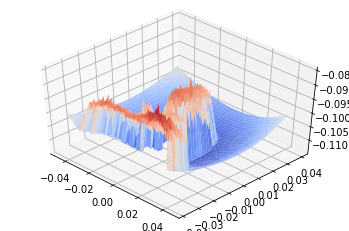

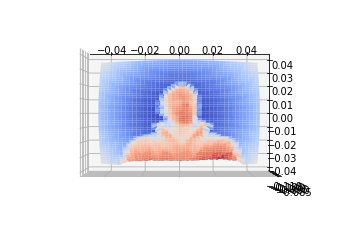

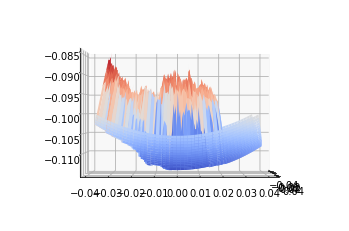

In [ ]:
# if you're not using the notebook in Colab, you can use "%matplotlib notebook"
# to create an interactive plot that can be rotated 
%matplotlib inline
def plot_3d(x,y,z,elev, azim):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(elev=elev, azim=azim)
  ax.plot_surface(x,y,-z,cmap=cm.coolwarm)


plot_3d(x, y, z, 45, -45)
plot_3d(x, y, z, 90, -90)
plot_3d(x, y, z, 0, 0)

The image you see at top is probably from a Time-of-Flight (ToF) camera, because there is a maximum distance, you can see that background is smooth.

### Usage of meshgrid

In [ ]:
a = np.array([0, 5, 10, 3])
b = np.array([1, 8])

In [ ]:
a, b = np.meshgrid(a, b)
print(a)
print(a.shape)
print(b)
print(b.shape)

[[ 0  5 10  3]
 [ 0  5 10  3]]
(2, 4)
[[1 1 1 1]
 [8 8 8 8]]
(2, 4)


In [ ]:
a, b = np.meshgrid(b, a)
print(a)
print(a.shape)
print(b)
print(b.shape)

[[1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]
 [1 1 1 1 8 8 8 8]]
(8, 8)
[[ 0  0  0  0  0  0  0  0]
 [ 5  5  5  5  5  5  5  5]
 [10 10 10 10 10 10 10 10]
 [ 3  3  3  3  3  3  3  3]
 [ 0  0  0  0  0  0  0  0]
 [ 5  5  5  5  5  5  5  5]
 [10 10 10 10 10 10 10 10]
 [ 3  3  3  3  3  3  3  3]]
(8, 8)


### Another Way

In [ ]:
img = np.load("/content/cs4250/data/exercise_2/ueb24.npy")
# img shape is (144, 176): height and width
x = np.ones(img.shape)
y = np.ones(img.shape)
z = np.ones(img.shape)

# calculate each pixel one by one
for i in range(img.shape[1]): # height
  for j in range(img.shape[0]): # width
    
    # choose each pixel with the corresponding focal length
    pixel_f = np.array([(i-center[0])*pixel_size, (j-center[1])*pixel_size, f])
    
    # normalize each pixel
    norm = pixel_f/np.linalg.norm(pixel_f)

    # map the given img 2D to 3D
    P_3D = norm*img[j][i]

    # assign the calculated values to corresponding indexes of X Y Z
    x[j][i] = P_3D[0]
    y[j][i] = P_3D[1]
    z[j][i] = P_3D[2]
print(pixel_f)
print(norm)
print(P_3D)
print(x.shape)

[0.00414 0.00222 0.008  ]
[0.44625129 0.23929417 0.86232134]
[0.0513189  0.02751883 0.09916695]
(144, 176)


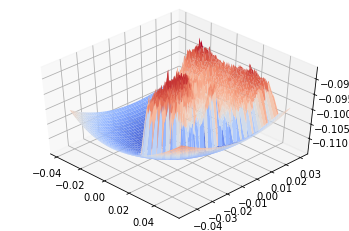

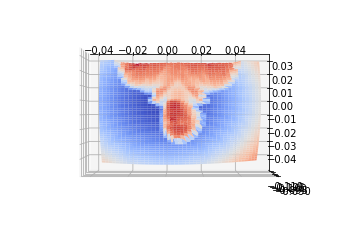

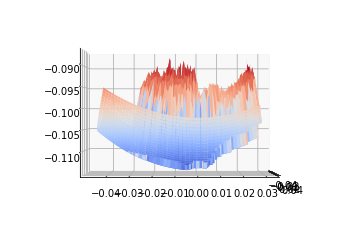

In [ ]:
# if you're not using the notebook in Colab, you can use "%matplotlib notebook"
# to create an interactive plot that can be rotated 
%matplotlib inline
def plot_3d(x,y,z,elev, azim):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(elev=elev, azim=azim)
  ax.plot_surface(x,y,-z,cmap=cm.coolwarm)


plot_3d(x, y, z, 45, -45)
plot_3d(x, y, z, 90, -90)
plot_3d(x, y, z, 0, 0)